# Assignment 1
## Problem 1 - System Identification


This problem deals with different universal approximators for memoryless systems. For this purpose, a training set $X_{train}$ consisting of $N_{train}=50$, and a test set consisting of $N_{test}=30$ samples are given. Both sets represent i.i.d. samples of a static nonlinearity $f(\cdot)$, corrupted by additive measurement noise $\nu$, with $\nu_i \sim \mathcal{N}(0, \sigma_\nu^2)$.

![System identification setup](../../data/figures/system-identification_small.png)
&ensp;
&ensp;
&ensp;

<center>Setup for the system identification task of Problem 1</center>


In [1]:
%reload_ext autoreload
#%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

# from src.models.mls_models import MyFancyModel
# from rbf_mlp import RbfNetwork
from src.utils.plotting import init_plot_style
%pylab
%matplotlib inline  

init_plot_style()
data_dir='../../data/csv/1_1_system_identification/'

warnings.filterwarnings('ignore') # Supress warnings from polyfit

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


First, let's take a look at the training and test data.

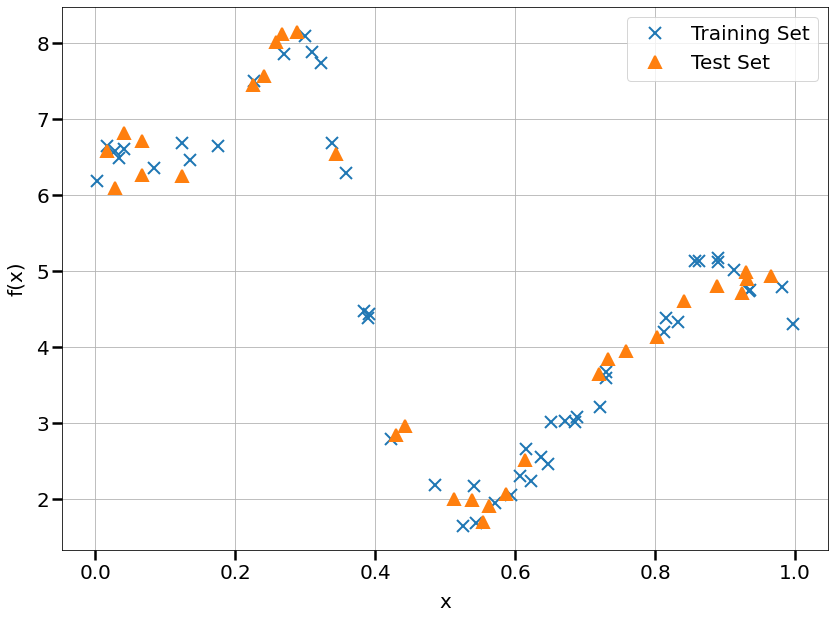

In [2]:
training_set = pd.read_csv(data_dir + 'training-set.csv').to_numpy()
x_train, y_train = training_set[:,0], training_set[:,1]

test_set = pd.read_csv(data_dir + 'test-set.csv').to_numpy()
x_test, y_test = test_set[:,0], test_set[:,1]

plt.close('all')
plt.figure()
plt.plot(x_train, y_train, 'x', label='Training Set')
plt.plot(x_test, y_test, '^', label='Test Set')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Run your experiments from here on!

<hr style='border:2.2px solid Black'></hr>

**Defenition of some functions for Task 1**

In [3]:
#Compute the MSE of the given coefficents p

def MSE(p,x,y):
        """Computing the 1D-MSE, given the polynomial coefficents p, the places x and the data y  """
        y_hat = np.polyval(p,x) 
        error = (y_hat-y)**2    
        mse = np.mean(error)
        return mse
    
    
# Evaluate the polynomial model
    
def PolyModelEval(order, x_fit, y_fit, x):
        """Evaluate the poly model, fited to the data [x_fit, y_fit] at x"""
        p = np.polyfit(x_fit, y_fit, order, full=False)
        y_hat = np.polyval(p,x)
        return y_hat
    
# For RBF linear least squares solution

def RbfOptimizer(P, w, x):
        """Compute the matrix A for finding the linear least squares solution based on the data x."""
        rbf_center = np.arange(0,1,1/P)
        A = np.ones([np.size(x), P])
        
        for i in range(0,np.size(x)):
            for j in range(1,P):
                A[i,j] = np.exp(1)**(-(x[i]-rbf_center[j])**2/w)
        return A
    

<hr style='border:2.2px solid Black'></hr>

**Task a)**

The training set should be used to find a polynomial model:
\begin{equation}
    \hat{f}(x) = \sum_{p=0}^P \alpha_px^p
\end{equation}
of order P ($P_{max}=25$), and with the parameters $\theta = \{\alpha_p\}_{p=1}^P$ which is optimal with respect to the mean squared error (MSE):
\begin{equation}
    J(\theta, P) = \frac{1}{N}\sum_{e=0}^{N-1}e_i^2
\end{equation}

In [4]:
#First test with polyfit

P_max = 25
residuals_train = np.zeros(P_max-1)
residuals_test = np.zeros(P_max-1)

for order in range(1,P_max):
    
    p = np.polyfit(x_train, y_train, order, full=False)
    residuals_train[order-1] = MSE(p,x_train, y_train)
    residuals_test[order-1] = MSE(p,x_test, y_test)
    
train_min = np.where(residuals_train == np.amin(residuals_train)) #optimal order
test_min = np.where(residuals_test == np.amin(residuals_test))    #optimal order


Visual inspection of the results:

In [5]:
#Plot of MSE for train and test 

#Plotting uncommented as the figures are included in the markdown cells!


#plt.figure(figsize=(10,6))
#plt.plot(np.arange(1,P_max),residuals_train, label='Training Set')
#plt.plot(np.arange(1,P_max), residuals_test, label='Test Set')
#plt.legend()
#plt.xlabel('Polynomial order P')
#plt.ylabel('MSE')
#plt.grid()
#plt.tight_layout()
#plt.show()


print('Optimal polynomial order for training set: ', train_min[0]+1, 'with MSE: ', residuals_train[train_min[0]])
print('Optimal polynomial order for test set: ', test_min[0]+1, 'with MSE: ', residuals_test[test_min[0]])

#Plot the optimal model with training/test set

x_eval = np.arange(0,1,0.005)
opt_train_model = PolyModelEval(train_min[0]+1, x_train, y_train, x_eval)
opt_test_model = PolyModelEval(test_min[0]+1, x_train, y_train, x_eval)

#Plotting uncommented as the figures are included in the markdown cells!


#plt.figure(figsize=(10,6))
#plt.plot(x_train, y_train, 'x', label='Training Set')
#plt.plot(x_test, y_test, '^', label='Test Set')
#plt.plot(x_eval, opt_train_model, label='Optimal Training Model')
#plt.plot(x_eval, opt_test_model, label='Optimal Test Model')
#plt.xlabel('x')
#plt.ylabel('f(x)')
#plt.legend()
#plt.grid()
#plt.tight_layout()
#plt.show()


Optimal polynomial order for training set:  [23] with MSE:  [0.02241836]
Optimal polynomial order for test set:  [20] with MSE:  [0.04568998]


Comparing the training and test MSE curves shows a quite similar behavior for both sets. The MSE starts with a rapid decrease up to $P=7$, followed by a slow, nearly monotonic decrease with increasing polynomial order. The difference betwen the MSE for the training-, and test-set is relatively small, indicating that all models generalize good, up to the maximal polynomial order.

![System identification setup](../../data/figures/p1_a_mse_curve.png)
&ensp;
&ensp;
&ensp;
<center> <em> Figure 1. MSE of the training-, and test-set over polynomial order</em></center>
&ensp;
&ensp;
&ensp;


Further analyzing the curve shows that the optimal training order is $P_{opt, train} = 23$, with an MSE of $0.0224$. The lowest MSE on the test set is archived with $P_{opt, test} = 20$, where a MSE of $0.0457$ was reached. 

![System identification setup](../../data/figures/p1_a_model_comp.png)
&ensp;
&ensp;
&ensp;
<center> <em> Figure 2. Optimal training-, and test-model</em></center>
&ensp;
&ensp;
&ensp;

Figure 2 shows a comparision of the optimal traing and test models over the training-, and test-samples. Both curves fit the data very well. Nevertheless, overfitting can be observed for the training model in the region of $x \in [0.95 ~1]$, which suggests that the model would generalize not as good as the test model. In this region, the polynomial is strongly fitted to the training samples, delivering an unrealistic behaviour besides those data points. Therefore, the test model with $P_{opt, test} = 20$ should be used to predict new samples which are not contained in the trining-, or test-set. 

As this behaviour is not obvious when solely comparing the MSE curve of both sets, a visual inspection of the final model (as long as possible) should be allways considered. Thus, model errors based on eg. overfitting in regions with sparse data could be easiliy identified.

<hr style='border:2.2px solid Black'></hr>

**Task b)** Use a subset of the original training set as validation set. Training and validation set must be disjoint.

The splitting ratio between training-, and validation set can be changed by changing the following variable:
```
TV_ratio = 0.3 #in [0,1]
```

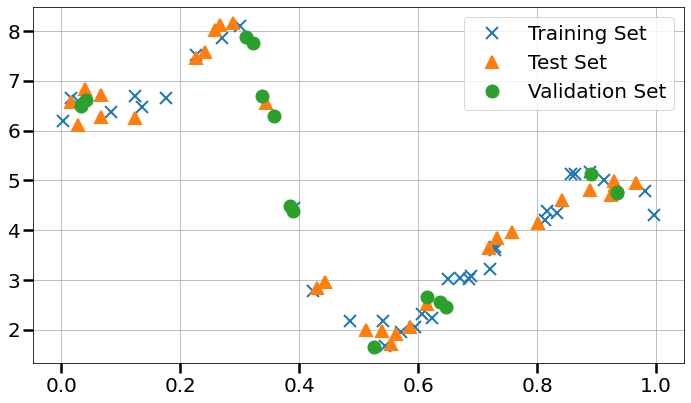

In [6]:
TV_ratio = 0.3 #Define splitting ratio btw. training and validation set, in [0,1]

N_sample = np.size(x_train)
Val_size = np.ceil(N_sample*TV_ratio)

rng = np.random.default_rng(7) #seed value set for repeatable results!!
pos = rng.choice(N_sample,Val_size.astype(int), replace=False) #Draw non-repetitive random numbers

x_validation = x_train[pos]
y_validation = y_train[pos]

x_train2 = np.delete(x_train, pos)
y_train2 = np.delete(y_train, pos)

# Plot the splitted data-set
plt.figure(figsize=(10,6))
plt.plot(x_train2, y_train2, 'x', label='Training Set')
plt.plot(x_test, y_test, '^', label='Test Set')
plt.plot(x_validation, y_validation, 'o', label='Validation Set')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Evaluation based on validation set performance:

In [7]:
P_max = 25

residuals_validation = np.zeros(P_max-1)
residuals_train = np.zeros(P_max-1)
residuals_test = np.zeros(P_max-1)

for order in range(1,P_max):
    
    p = np.polyfit(x_train2, y_train2, order, full=False)
    residuals_train[order-1] = MSE(p,x_train2, y_train2)
    residuals_validation[order-1] = MSE(p,x_validation, y_validation)
    residuals_test[order-1] = MSE(p,x_test, y_test)
    
validation_min = np.where(residuals_validation == np.amin(residuals_validation)) #optimal order
test_min = np.where(residuals_test == np.amin(residuals_test))

print('Optimal polynomial order for validation set: ', validation_min[0]+1, 'with MSE: ', residuals_validation[validation_min[0]])
print('Optimal polynomial order for test set: ', test_min[0]+1, 'with MSE: ', residuals_test[test_min[0]])

Optimal polynomial order for validation set:  [21] with MSE:  [0.03892393]
Optimal polynomial order for test set:  [21] with MSE:  [0.05241151]


Visual inspection of the results:

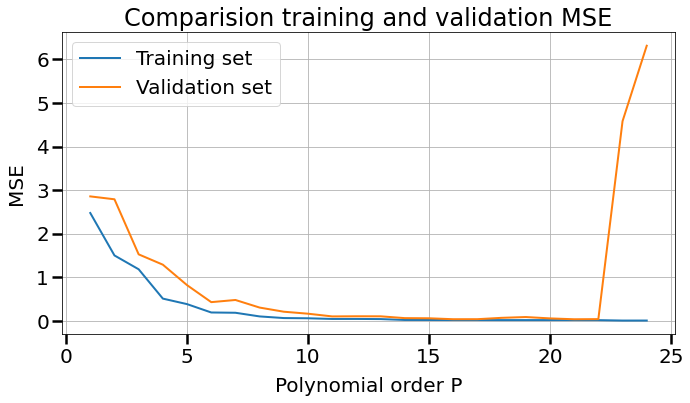

Figure 3. MSE of the training-, and validation-set over polynomial order


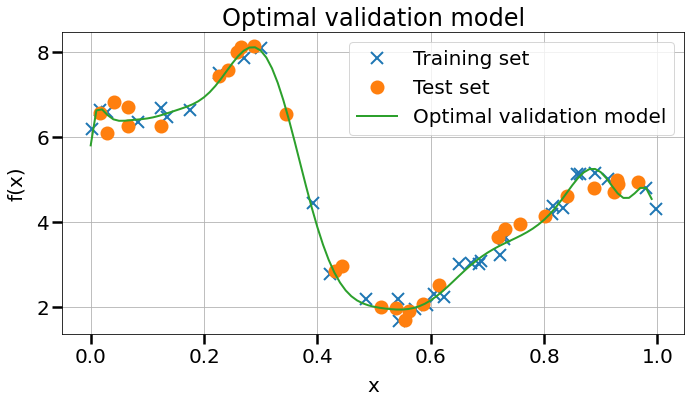

Figure 4. Optimal validation model


In [8]:
#Plot the training and validation MSE curve

plt.close('all')
plt.figure(figsize=(10,6))
plt.plot(np.arange(1,P_max),residuals_train, label='Training set')
plt.plot(np.arange(1,P_max), residuals_validation, label='Validation set')
plt.xlabel('Polynomial order P')
plt.ylabel('MSE')
plt.title('Comparision training and validation MSE')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

disp('Figure 3. MSE of the training-, and validation-set over polynomial order')

#Plot of the optimal model based on test set

x_eval = np.arange(0,1,0.01)
y_opt_model = PolyModelEval(validation_min[0]+1, x_train2, y_train2, x_eval)

plt.figure(figsize=(10,6))
plt.plot(x_train2, y_train2, 'x', label='Training set')
plt.plot(x_test, y_test, 'o', label='Test set')
plt.plot(x_eval, y_opt_model, label='Optimal validation model')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Optimal validation model')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

disp('Figure 4. Optimal validation model')


Figure 3. shows again the MSE of the different models, over the training-, and validation sets for increasing polynomial order $P$. The behaviour of the MSE for low polynomial order is quite similar to the previous case with the test set. Nevertheless, the MSE difference in this region is much larger. After $P\sim 11 $, both cuves converge approvimately to the same value, with a minimum MSE on the validation set at $P=21$. Further increasing $P$ causes a rapid increase of the MSE on the validation set, while the training MSE is still decreasing. This clearly indicates overfitting to the training set. 

As mentioned, the best model for the validation set has order $P=21$, and archives a MSE on the test set of $0.052$. This is a quite similar result as in the first task, altough the overall MSE is slightly higher. Figure 4. shows this optimal validation model along with the given data for the (reduced) training set, and the test set. 

Ths split size has a direct effect on the model quality, as we are working with a relatively small data set.  Therefore, increasing the ```TV_ratio``` reduces the training set, which is necessary for the basic model construction. On the other hand, the quality of the validation set improves, as more and more samples are available for model evaluation. In contrast to that, a small ```TV_ratio``` might not represent the actual function in the validation set, as only very few samples are available for the model evaluation. As a consequence, unfavorable models might yield a small validation MSE. 

In our case, we came up with the optimal splitting ratio by variing its value, and analyzing the MSE on the traing, and validation set. The lowest MSE was archived for a ```TV_ratio``` of $0.3$, and yielded in $MSE_{valid} = 0.039$, and $MSE_{test} = 0.0524$ 

<hr style='border:2.2px solid Black'></hr>

**Task c)** Use a Gaussian radial basis ($RBF$) function model $\hat{f}$

$\hat{f}(x) = \alpha_0 + \sum_{p=1}^{P} \alpha_p e^{\frac{-(x-c_p)^2}{2\omega_p^2}}$

To avoid a nonlinearity, the centers of the P-$RBF$ are choosen evenly spaced over the support of the given data. Using the given data sets $\mathbf{x}[n]$, and $\mathbf{y}[n]$, a simplification to a linear model in the coefficents $\alpha_p$ is possible. This can be further rewritten to a linear matrix vector multiplication:

\begin{equation}
    \mathbf{y}_{train} = \mathbf{A} \cdot \alpha
\end{equation}

Where $A$ is defined as:
&ensp;

\begin{equation}
A = \begin{bmatrix}
1 & e^{\frac{-(x[0]-c_1)^2}{2\omega^2}} & e^{\frac{-(x[1]-c_1)^2}{2\omega^2}} & \dots & e^{\frac{-(x[N]-c_1)^2}{2\omega^2}}\\
1 & e^{\frac{-(x[0]-c_2)^2}{2\omega^2}} & e^{\frac{-(x[1]-c_2)^2}{2\omega^2}} & \dots & e^{\frac{-(x[N]-c_2)^2}{2\omega^2}}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & e^{\frac{-(x[0]-c_P)^2}{2\omega^2}} & e^{\frac{-(x[1]-c_P)^2}{2\omega^2}} & \dots &  e^{\frac{-(x[N]-c_P)^2}{2\omega^2}}
\end{bmatrix}
\end{equation}

And $\alpha$ denotes the coefficent vecor, consitsiong of all $\alpha_i$.

The optimal coefficent vector $\alpha_{opt}$ is determined by means of minimizing the MSE for thge given model oder P:

\begin{equation}
\alpha_{opt} = \underbrace{(\mathbf{A}^T\mathbf{A})^{-1} \mathbf{A}^T}_{\text{Moore–Penrose inverse}}\cdot  \mathbf{y}_{train}
\end{equation}

We implemented the computation of matrix A in the fuction ```RbfOptimizer(P, w, x)```, and computed the optimal coefficent vector using ```np.linalg.pinv(A).dot(y_train)```. The benefit of this method is that once A is computed, the model can be easily evaluated by a multiplication with the coefficent vector $\alpha$.


**Model design**

Three parameters must be manually choosen before the RBF-model could be evaluated. The first one, $P$, determines the number of guassian basis functions, used to approximate the nonlinear system. It is a very crucial parameter, as it directly affects the performance of the model. Choosing $P$ too low will yield in a very smooth model (if $\omega^2$ is large), which is not capable of modeling any rapid changes in the underlaying system. This is a direct effect of the inherent smoothness of gaussian RBF. On the other hand, a large $P$, compared with a small width parameter $\omega^2$ will create a delta like model, which is very susceptable to overfitting. (Can be easily created by changing $P$ to $200$) Hence, we choose $P=20$, as it seems like a reasonable number for representing the given function. 

Once $P$ is fixed, the individual positions of the basis functions $c_p$ must be defined. This was straigtfoward in our case, as the RBF should be evenly spaced over the support. Therefore, their position was computed using ```rbf_center = np.arange(0,1,1/P)```. 

The last parameter to choose was the width parameter $\omega^2$. It defines the width of the gaussian basis functions, and was choosen equally for all functions ($\omega^2 = \omega_p^2$) to simplify the computation of the model. As previously mentioned, a smaller $\omega^2$ results in narrower basis functions, which can be used to model e.g. a frequently changing nonlinearity. Nevertheless, problems with overfitting might occur. If $\omega^2$ is too large, the the individual basis functions start to overlap significantly, and can not resolv rapid changes, or smaller structures in the original system. We have choosen a dynamic width parameter for our system, depending on the number of basis functions with $\omega^2 = \big(\frac{2}{\alpha}\big)^2$. Therefore, a sufficent overlap between the RBG could be guaranteed, while maintaining the necessary model resolution. Empirical testing has showed that a lower MSE could be archived by multiplying this value by the factor of two. 

Problems could occur if the width parameter $\omega^2$ is independant of the model order $P$, as a smaller order requires wider basis functions to cover the full domain of $x$. If this connection is ommited, the model would be unable to model the system. In this case, the narrow RBF's drop so fast towards zero, that the region between adjacent RBF's could not modeled with the available functions. The problem is smaller in the other case - many RBF's with large width parameter, as some RBF's could be simply supressed by setting their corresponding $\alpha$ to zero.

**Model evaluation**
The optimal model order was determined by evaluating the model over the reduced test set, and computing the MSE on the validation set. The optimal model on the validation set whas then evaluated on the test set. The location parameter $c_p$, and the width parameter $\omega^2$ was choosen as previosly described.

Optimal RBF order for training set:  [25] with MSE:  [[0.00609635]]
Optimal RBF order for validation set:  [13] with MSE:  [[0.04833838]]


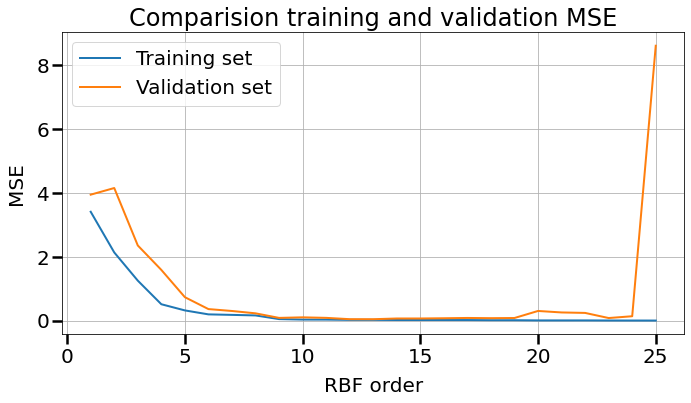

Figure 5. MSE of the training-, and validation-set over RBF order


In [15]:
#Determine the optimal order based on validation set performance
P = 26 # max number of RBF's

mse_train = np.zeros([P-1,1])
mse_valid = np.zeros([P-1,1])

for order in range(1,P):
    w2 = (2/order)**2                    #width parameter squared
    rbf_center = np.arange(0,1,1/order)  #RBF centers
    
    A = RbfOptimizer(order, w2, x_train2)     
    c_opt = np.linalg.pinv(A).dot(y_train2)
    
    y_hat_train = RbfOptimizer(order, w2, x_train2).dot(c_opt)
    y_hat_valid = RbfOptimizer(order, w2, x_validation).dot(c_opt)
    mse_train[order-1] = np.mean((y_hat_train-y_train2)**2)  
    mse_valid[order-1] = np.mean((y_hat_valid-y_validation)**2)
    
mse_min_train = np.where(mse_train == np.amin(mse_train)) #optimal order

print('Optimal RBF order for training set: ', mse_min_train[0]+1, 'with MSE: ', mse_train[mse_min_train[0]])

mse_min_valid = np.where(mse_valid == np.amin(mse_valid)) #optimal order
print('Optimal RBF order for validation set: ', mse_min_valid[0]+1, 'with MSE: ', mse_valid[mse_min_valid[0]])

plt.figure(figsize=(10,6))
plt.plot(np.arange(1,P,1), mse_train, label='Training set')
plt.plot(np.arange(1,P,1), mse_valid, label='Validation set')
plt.xlabel('RBF order')
plt.title('Comparision training and validation MSE')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

disp('Figure 5. MSE of the training-, and validation-set over RBF order')


Figure 5. shows again the MSE over the RBF order. The lowest MSE on the validation set was archived for $P=13$. Therefore, a RBF model of this order was then evaluated on the test set:

MSE on test set:  0.050864889480220825


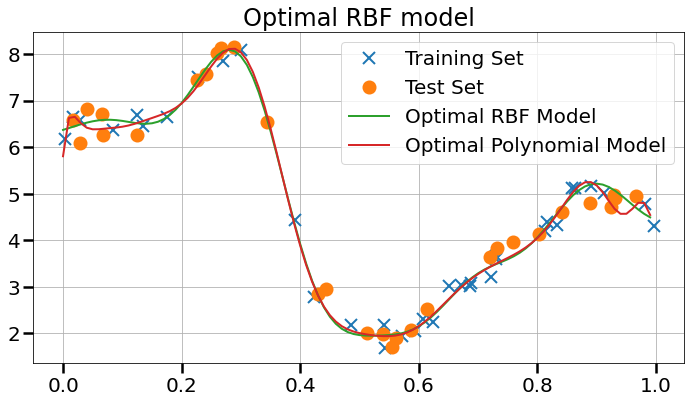

Figure 6. Model comparision of the optimal RBF, and polynomial model


In [10]:
P = 13 #number of RBF's

rbf_center = np.arange(0,1,1/P)
w2 = (2/P)**2 #width parameter sqared

A = RbfOptimizer(P, w2, x_train2)     
c_opt = np.linalg.pinv(A).dot(y_train2)

#Evaluate the model with test set

y_hat = RbfOptimizer(P, w2, x_test).dot(c_opt)  #for MSE compuation
mse = np.mean((y_hat-y_test)**2)  

print('MSE on test set: ', mse)

x_eval = np.arange(0,1,0.01)
y_eval = RbfOptimizer(P, w2, x_eval).dot(c_opt) #for plot

#Plot the model for the selected model order P

plt.figure(figsize=(10,6))
plt.plot(x_train2, y_train2, 'x', label = 'Training Set')
plt.plot(x_test, y_test, 'o', label='Test Set')
plt.plot(x_eval, y_eval, label = 'Optimal RBF Model')
plt.plot(x_eval, y_opt_model, label='Optimal Polynomial Model')
plt.title('Optimal RBF model')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

disp('Figure 6. Model comparision of the optimal RBF, and polynomial model')

The RBF model of order $P=13$ archived an MSE of $0.0508$ on the test set. This is slightly lower than the $0.0524$, archived with the polynomial model of order $P=21$.

Figure 6. shows now a direct comparision of the optimal (w.r.t the MSE on the validation set) RBF-, and polynomial models. Both models fit very well to the data, and behave nealy identical in the region between $0.2$ and $0.9$. Nevertheless, the polynomial model shows beginning overfitting in the outer regions. Hence, the RBF model should be preffered over the polynomial model for predicting samples outside the given test, and training sets.

Manually selecting the widths-, and centers will be problemetic for high-dimensional input data. In this case, the evenly spaced RBF, and potential different $\omega^2$ would create a model with a huge ammount of parameters ($\alpha_p$) which must be optimized. Not only will this be a very difficult task, but the high complexity is also surely not necessary.The data will most likely populate some sub space of the high dimensional input space, such that a modeling capability in the whole $\mathrm{R}^{100}$ is surely not needed. Therefore, learning the width-, and position parameters is an inportant task.

<hr style='border:2.2px solid Black'></hr>

**Task d)** Learn the optimal centers and widths using gradient descent (GD) applyed on a RBF-NN. 

Implementing the RBF-model in a neuronal-network (NN) is not a strightfoward process. Therefore, is is allways a good idea to start small, determine the dimensionality of the variables, and explicitly formulate the nonlinear transform depicted in the NN. Starting with $P=3$, a RBF-NN for $x\in \mathrm{R}^1, y\in \mathrm{R}^1$ and $\hat{f}(x): \mathrm{R}^1 \rightarrow \mathrm{R}^1$ would look like:

\begin{equation}
 y = \hat{f}(x) = \alpha_0 + \sum_{p=1}^P \alpha_p \big[\phi ( \omega_{p,1}\cdot x_1+ \omega_{p,0})\big]
\end{equation}

This could be explicitly written for the given gaussian (RBF) basis functions:

\begin{equation}
 y = \hat{f}(x) = \alpha_0 + \sum_{p=1}^P \alpha_p \exp{\big[ \frac{-1}{2\omega_p^2} (x-c_p)^2\big]}
\end{equation}

Which is equivalent to:

\begin{equation}
 y = \hat{f}(x) = \alpha_0 + \sum_{p=1}^P \alpha_p \exp{ \bigg(-\Big[ \sqrt{\frac{1}{2\omega_p}} \cdot x - c_p \sqrt{\frac{1}{2\omega_p^2}} \Big]^2 \bigg)}
\end{equation}

In this case, the non linear activation function $\phi(x) = \exp{-[x]^2}$, as well as the linear transform $z(x) = \underbrace{\sqrt{\frac{1}{2\omega_p}}}_{\omega_{p,1}} \cdot x + \underbrace{(-c_p \sqrt{\frac{1}{2\omega_p^2}})}_{\omega_{p,0}}$ becomes visible. Following from that, a simple sketch of the NN can be drawn:


![System identification setup](../../data/figures/RBF_NN.jpg)
&ensp;
&ensp;
&ensp;
<center> <em>Figure 7. Sketch of a simple NN with order P=3</em> </center>

As we deal with a one dimensional input parameter, the weight matrix simplifies to a weight vector 


**Compute the gradients**

The gradient $\nabla$ could be computet with respect to the weights ($\nabla{\alpha}$), the width parameters ($\nabla{\omega}$) or the centers ($\nabla{c}$). Each gradient is hereby defined as:

\begin{equation}
\nabla_{x} = \left( \begin{array}{c} \frac{\partial}{\partial x_1}\\ \frac{\partial}{\partial x_2} \\ \frac{\partial}{\partial x_3} \end{array}\right)
\end{equation}

Therefore:

\begin{equation}
\nabla_{\omega} \hat{f}(x) = \left( \begin{array}{c} \alpha_1 \frac{1}{\omega_1^3}(x-c_1)^2\exp{\big(\frac{-1}{2\omega_1^2}(x-c_1)^2\big)}\\ \alpha_2 \frac{1}{\omega_2^3}(x-c_2)^2\exp{\big(\frac{-1}{2\omega_2^2}(x-c_2)^2\big)}\\ \alpha_3 \frac{1}{\omega_3^3}(x-c_3)^2\exp{\big(\frac{-1}{2\omega_3^2}(x-c_3)^2\big)} \end{array}\right)
\end{equation}

and:

\begin{equation}
\nabla_{c} \hat{f}(x) = \left( \begin{array}{c} \alpha_1 \frac{1}{\omega_1^2}(x-c_1)\exp{\big(\frac{-1}{2\omega_1^2}(x-c_1)^2\big)}\\ \alpha_2 \frac{1}{\omega_2^2}(x-c_2)\exp{\big(\frac{-1}{2\omega_2^2}(x-c_2)^2\big)}\\ \alpha_3 \frac{1}{\omega_3^2}(x-c_3)\exp{\big(\frac{-1}{2\omega_3^2}(x-c_3)^2\big)} \end{array}\right)
\end{equation}

as well as:


\begin{equation}
\nabla_{\alpha} \hat{f}(x) = \left( \begin{array}{c} 1\\ \exp{\big(\frac{-1}{2\omega_1^2}(x-c_1)^2\big)}\\ \exp{\big(\frac{-1}{2\omega_2^2}(x-c_2)^2\big)}\\ \exp{\big(\frac{-1}{2\omega_3^2}(x-c_3)^2\big)} \end{array}\right)
\end{equation}


For this task, the given MLP was adapted to utilize RBFs as activation functions...


```z1 = torch.exp(-torch.pow(self.hidden_layer_1(x),2))```

Epoch 0 training loss is 5.36
Epoch 50 training loss is 0.25
Epoch 100 training loss is 0.06
Epoch 150 training loss is 0.06
Epoch 200 training loss is 0.05
Epoch 250 training loss is 0.06


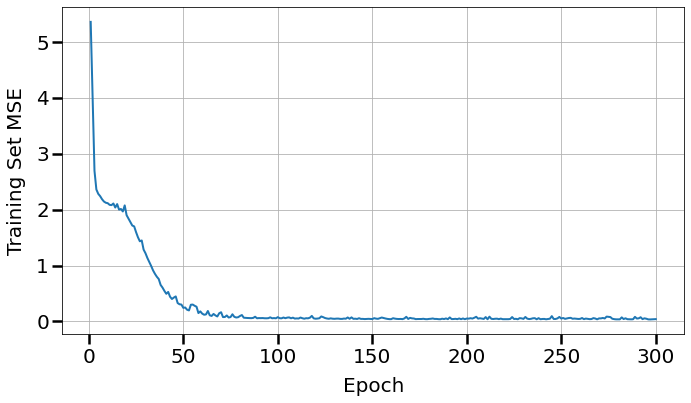

In [11]:
from src.models.rbf_mlp import RbfMLP

rbf_mlp_model = RbfMLP(hidden_size = 45)
loss_list = rbf_mlp_model.fit(x_train, y_train, learning_rate=4e-2)

plt.figure(figsize=(10,6))
plt.plot(list(range(1, 1 + len(loss_list))), loss_list)
plt.xlabel('Epoch')
plt.ylabel('Training Set MSE')
plt.grid()
plt.tight_layout()

Training MSE is 0.0425
Test MSE is 0.0433


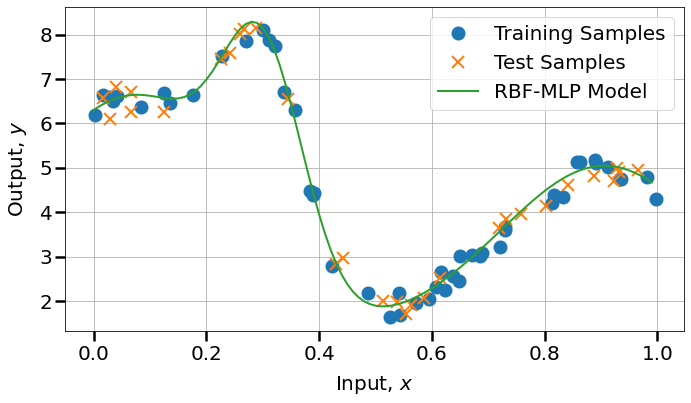

In [12]:
x_eval = np.arange(0,1,0.01)

approx_output = rbf_mlp_model.predict(x_eval)
y_pred = rbf_mlp_model.predict(x_test)

print(f'Training MSE is {loss_list[-1]:.4f}')
print(f'Test MSE is {np.mean((y_test-np.transpose(y_pred))**2):.4f}')

plt.figure(figsize=(10,6))
plt.plot(x_train, y_train, 'o', label='Training Samples')
plt.plot(x_test, y_test, 'x', label='Test Samples')
plt.plot(x_eval, approx_output, label='RBF-MLP Model')
#plt.plot(x_eval, y_eval, label = 'Static RBF Model')
plt.xlabel('Input, $x$')
plt.ylabel('Output, $y$')
plt.legend()
plt.grid()
plt.tight_layout()

![System identification setup](../../data/figures/p1_d_low_training_test_mse.png)
&ensp;
&ensp;
&ensp;
<center> <em> Figure X. Model with low training and test MSE</em></center>
&ensp;
&ensp;
&ensp;

Figure X shows one of our best models, with a $MSE_{train} = 0.038$ and $MSE_{test} = 0.36$. The model was found using the single layer MLP with gaussian activation functions. It was trained over 300 ebochs with an learning rate of $4\cdot10^{-2}$ and outperforms all polynomial models on the test set. Interestingly, the MSE is even lower on the test-, than on the training set, which indicates a good model and suggest very good generaloization.

&ensp;

<hr style='border:2.2px solid Black'></hr>

**Task e)** Approximation using a feed-foward neuronal network. 

In [18]:
from src.models.variable_rbf_mlp import VarRbfMLP

h_list = [100,100,100,100,100] #creates a 4 layer MLP with 200 neurons per layer

rbf_mlp_model = VarRbfMLP(h_sizes = h_list)
loss_list = rbf_mlp_model.fit(x_train, y_train, batch_size=15
                              , learning_rate=5e-3, max_epochs=200)

x_eval = np.arange(0,1,0.01)

approx_output = rbf_mlp_model.predict(x_eval)
y_pred = rbf_mlp_model.predict(x_test)


Epoch 0 training loss is 8.90
Epoch 50 training loss is 1.02
Epoch 100 training loss is 0.11
Epoch 150 training loss is 0.25


A very good combination is a three layer network with 20 neurons per layer, and sigmoidal activation function. The other params where: learning rate 1e-2, 2000 epochs and batch size 15. 

The archivable MSE with this model where around 0.027 on the training set, and 0.0494 on the test set. Overfitting was not realy observed, but the performance on the test set was worse than with the bigger network.


Training MSE is 0.0316
Test MSE is 0.0611


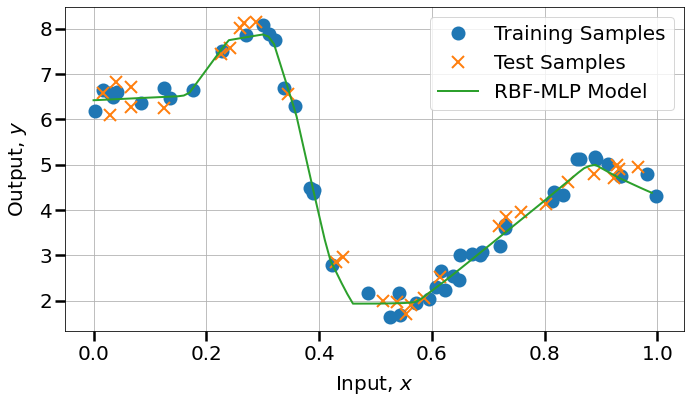

In [14]:
print('')
print(f'Training MSE is {loss_list[-1]:.4f}')
print(f'Test MSE is {np.mean((y_test-np.transpose(y_pred))**2):.4f}')

plt.figure(figsize=(10,6))
plt.plot(x_train, y_train, 'o', label='Training Samples')
plt.plot(x_test, y_test, 'x', label='Test Samples')
plt.plot(x_eval, approx_output, label='RBF-MLP Model')
#plt.plot(x_eval, y_eval, label = 'Static RBF Model')
plt.xlabel('Input, $x$')
plt.ylabel('Output, $y$')
plt.legend()
plt.grid()
plt.tight_layout()


![System identification setup](../../data/figures/P1_e_overfitting_sigmoidal_network.png)
&ensp;
&ensp;
&ensp;
<center> <em> Figure X. Overfitting on the training data with multi-layer network</em></center>
&ensp;
&ensp;
&ensp;

Figure X shows an example of overfitting, which was archived by using a 5-layer networks, with 200 neurons per layer and a sigmoidal activation function. The networks was trained for $1000$ epochs, and shows destinct steps in the final model, which indicate beginning overfittiing on the training data. 